In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/annotated-hatetweets-4-classes_train.csv")
print("Valeurs NaN par colonne :\n", df.isnull().sum())

Valeurs NaN par colonne :
 Unnamed: 0           0
tweet_id             0
new_tweet_content    0
Label                0
dtype: int64


Data Before


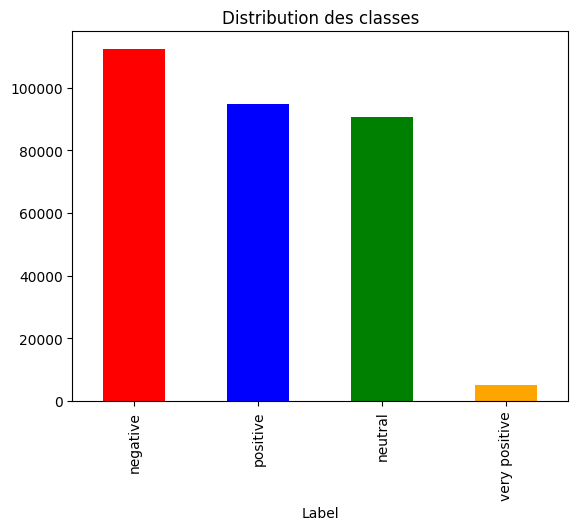

In [ ]:
import matplotlib.pyplot as plt
df["Label"].value_counts().plot(kind="bar", color=["red", "blue", "green", "orange"])
plt.title("Distribution des classes")
plt.show()


In [ ]:
print(df["Label"].value_counts())
df["Label"] = df["Label"].replace("very positive", "positive")
print(df["Label"].value_counts())


Label
negative    50526
positive    49999
Name: count, dtype: int64
Label
negative    50526
positive    49999
Name: count, dtype: int64
Label
negative    50523
positive    49996
Name: count, dtype: int64


Equilibrage des données


In [ ]:
import pandas as pd

pourcentage_suppression = 0.1
df_positive = df[df["Label"] == "negative"]

df_positive_a_supprimer = df_positive.sample(frac=pourcentage_suppression, random_state=42)
df = df.drop(df_positive_a_supprimer.index)

print(df["Label"].value_counts())


Suppression du neutral


In [ ]:
print(df["Label"].value_counts())
df = df[df["Label"] != "neutral"]
print(df["Label"].value_counts())


Label
negative    101052
positive     99998
Name: count, dtype: int64
Label
negative    101052
positive     99998
Name: count, dtype: int64


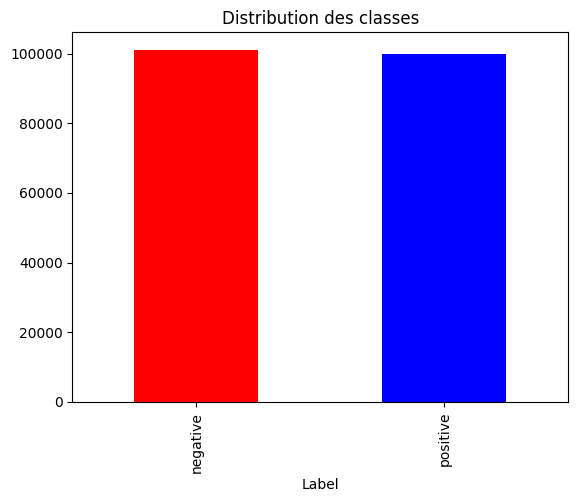

In [ ]:
df["Label"].value_counts().plot(kind="bar", color=["red", "blue"])
plt.title("Distribution des classes")
plt.show()
df.to_csv("dataset_equi.csv", index=False, encoding="utf-8")

In [ ]:
from sklearn.model_selection import train_test_split

df_reduit, _ = train_test_split(df, test_size=0.5, stratify=df["Label"], random_state=42)

In [ ]:
print(df_reduit["Label"].value_counts())
df_reduit.to_csv("dataset_equi50.csv", index=False, encoding="utf-8")

Label
negative    50526
positive    49999
Name: count, dtype: int64


**Nettoyage des Données**


Installation des Library


In [ ]:
!apt-get install -y cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
libboost-all-dev is already the newest version (1.74.0.3ubuntu7).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
pip install camel-tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.4/556.4 kB 19.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.5/124.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install camel-tools nltk pyarabic matplotlib wordcloud

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.5/556.5 kB 13.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

Fonction du nettoyage


In [ ]:
pip install --upgrade numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 75.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
camel-tools 1.5.6 requires numpy<2, but you have numpy 2.2.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<

In [ ]:
import pandas as pd

# df = pd.read_csv('allCategories.csv')
df = pd.read_csv('personnalized.csv')
print(df['Class'].value_counts())

Class
hate    750
Name: count, dtype: int64


In [ ]:

import re
from pyarabic import araby
from camel_tools.utils.dediac import dediac_ar
from camel_tools.utils.normalize import normalize_alef_ar, normalize_alef_maksura_ar, normalize_teh_marbuta_ar

def ortho_normalize(text):
    text = normalize_alef_maksura_ar(text)
    text = normalize_alef_ar(text)
    text = normalize_teh_marbuta_ar(text)
    return text

def clean_text(text):
    if isinstance(text, str):  
        text = re.sub(r"http\S+|www\S+", "", text)  
        text = re.sub(r"@\w+", "", text)  
        text = re.sub(r"#\w+", "", text)  
        text = re.sub(r'[^\u0600-\u06FF\s]|[\d٠-٩]', '', text) 
        text = re.sub(r"[^\w\s]", "", text)  
        text = dediac_ar(text)  
        text = ortho_normalize(text)
        text = araby.normalize_hamza(text)
        return text
    return ""


In [ ]:
df["clean_text"] = df["lemmatized_text"].apply(clean_text)
print(df.iloc[77]["clean_text"])
print(df.iloc[77]["lemmatized_text"])

كيلك ب مكيل عنصر ب امتياز فرقه ان عمل مسلسل ل معوي هو ملك اسلامي و مءسس دوله هو حكم هو سنه و بين قاتل ل عين لثاني خليفه و امير ل مءمن ف تشيع دين فارس علاق هو اسلام
كيلك بِ مُكِيَّل عُنصُر بِ امتياز فِرقَة أَنَّ عَمِل مُسَلسَل لِ مَعوَى هُوَ مِلك إِسلَامِيّ وَ مُءَسِّس دَولَة هُوَ حُكم هُوَ سَنَة وَ بَينَ قَاتِل لِ عَين لُثَانِيّ خَلِيفَة وَ أَمِير لِ مُءَمِّن فَ تَشَيُّع دِين فارس عِلَاق هُوَ إِسلَام


Suppression des stopwords


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

arabic_stopwords = set(stopwords.words('arabic'))


def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in arabic_stopwords]
    return " ".join(filtered_words)


df["stop_text"] = df["clean_text"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(df.iloc[77]["lemmatized_text"])
print(df.iloc[77]["clean_text"])
print(df.iloc[77]["stop_text"])

df.to_csv("personnalized_dataset.csv", index=False, encoding="utf-8")

كيلك بِ مُكِيَّل عُنصُر بِ امتياز فِرقَة أَنَّ عَمِل مُسَلسَل لِ مَعوَى هُوَ مِلك إِسلَامِيّ وَ مُءَسِّس دَولَة هُوَ حُكم هُوَ سَنَة وَ بَينَ قَاتِل لِ عَين لُثَانِيّ خَلِيفَة وَ أَمِير لِ مُءَمِّن فَ تَشَيُّع دِين فارس عِلَاق هُوَ إِسلَام
كيلك ب مكيل عنصر ب امتياز فرقه ان عمل مسلسل ل معوي هو ملك اسلامي و مءسس دوله هو حكم هو سنه و بين قاتل ل عين لثاني خليفه و امير ل مءمن ف تشيع دين فارس علاق هو اسلام
كيلك مكيل عنصر امتياز فرقه ان عمل مسلسل معوي ملك اسلامي مءسس دوله حكم سنه قاتل لثاني خليفه امير مءمن تشيع دين فارس علاق اسلام


**LEMMATISATION**


In [ ]:
import pandas as pd
import re


def normalize_text(text):
    text = str(text)  

    original_text = text 

    
    text = re.sub(r'هه+', 'هه', text)
    text = re.sub(r'([^ه])\1{2,}', r'\1', text)

    if text != original_text:
        print(f"Texte original : {original_text}")
        print(f"Texte après normalisation : {text}\n")

    return text


df['normalized_text'] = df['stop_text'].apply(normalize_text)

print("✅ Normalisation terminée.")

✅ Normalisation terminée.


In [ ]:
df.to_csv("personnalized_dataset.csv", index=False, encoding="utf-8")

In [ ]:
pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 48.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu

In [ ]:
import pandas as pd

df=pd.read_csv("allCleanCategories.csv")
print("Valeurs NaN par colonne :\n", df.isnull().sum())



Valeurs NaN par colonne :
 text                0
hate_speech_type    0
clean_text          0
stop_text           0
normalized_text     0
dtype: int64


In [ ]:
import stanza
import pandas as pd
from tqdm import tqdm

stanza.download("ar")
nlp = stanza.Pipeline("ar", use_gpu=True)  


if "normalized_text" not in df.columns:
    raise KeyError("❌ Erreur : La colonne 'clean_text' n'existe pas dans le dataset.")


def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [word.lemma for sentence in doc.sentences for word in sentence.words]
    return " ".join(lemmas)

tqdm.pandas()
df["lemmatized_text"] = df["normalized_text"].progress_apply(lemmatize_text)



df.to_csv("dataset_cleaned.csv", index=False, encoding="utf-8")

print("✅ Dataset lemmatizé et enregistré dans 'dataset_cleaned.csv'")
df.head()

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: ar (Arabic) ...


INFO:stanza:Downloaded file to /root/stanza_resources/ar/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ar (Arabic):
| Processor | Package       |
-----------------------------
| tokenize  | padt          |
| mwt       | padt          |
| pos       | padt_charlm   |
| lemma     | padt_nocharlm |
| depparse  | padt_charlm   |
| ner       | aqmar_charlm  |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
100%|██████████| 8639/8639 [18:56<00:00,  7.60it/s]


✅ Dataset lemmatizé et enregistré dans 'dataset_cleaned.csv'


,text,hate_speech_type,clean_text,stop_text,normalized_text,lemmatized_text
0,@ALMRISEUL انقلع بس الآسيويه صعبه قويه,identity-based,انقلع بس الاسيويه صعبه قويه,انقلع الاسيويه صعبه قويه,انقلع الاسيويه صعبه قويه,انقلع الاسيويه صَعب هُوَ قويه
1,@AhmadDaoud14 الشاب مامي مغني عالمي في وقته غل...,racisme,الشاب مامي مغني عالمي في وقته غلط دخل السجن و...,الشاب مامي مغني عالمي وقته غلط دخل السجن نورما...,الشاب مامي مغني عالمي وقته غلط دخل السجن نورما...,شَابّ مامي مَغنِيّ عَالَمِيّ وَقت هُوَ غلط دَخ...
2,@AL24newschannel زريعة القنب كي سميتك ك فعايلك...,racisme,زريعه القنب كي سميتك ك فعايلك العياد بالله,زريعه القنب سميتك فعايلك العياد بالله,زريعه القنب سميتك فعايلك العياد بالله,زَرِيع هُوَ قَنب سمية هُوَ فعايلك عِيَاد بَالِه
3,@mohammed_oden @Skkoper يرجال رح بس خلك على ون...,identity-based,يرجال رح بس خلك علي ون بيس افضل لك يا دب قال...,يرجال رح خلك علي ون بيس افضل دب قالك اذا سب اس...,يرجال رح خلك علي ون بيس افضل دب قالك اذا سب اس...,رَجَال رح خلك عَلَى ون بِيس أَفضَل دَب قَالَك ...
4,@TrendEPL هاد خادش تاريخ ليفربول كله بالخماسية...,identity-based,هاد خادش تاريخ ليفربول كله بالخماسيه و لسا بي...,هاد خادش تاريخ ليفربول كله بالخماسيه لسا بيحكي...,هاد خادش تاريخ ليفربول كله بالخماسيه لسا بيحكي...,هاد خادش تَارِيخ لِ يَفرَبُول كله بِ خَمَاسِيّ...


In [ ]:
df.to_csv("/content/drive/MyDrive/Mydataset1.csv", index=False, encoding="utf-8")

NameError: name 'df' is not defined

In [ ]:
print(df.iloc[3]["new_tweet_content"])
print(df.iloc[3]["clean_text"])
print(df.iloc[3]["stop_text"])
print(df.iloc[3]["lemmatized_text"])

الأمنيآت ليست مستحيلة لكن ينقصها الدعآء الحمدلله الذي لا يصرف عنّا شيئاً إلآّ لـ حكمة ثمّ يعوضنآ بـالأجمل
الامنيات ليست مستحيله لكن ينقصها الدعاء الحمدلله الذي لا يصرف عنا شيءا الا لـ حكمه ثم يعوضنا بـالاجمل
الامنيات مستحيله ينقصها الدعاء الحمدلله يصرف عنا شيءا الا لـ حكمه يعوضنا بـالاجمل
أَمنِيَّة مُستَحِيل هُوَ أَنقَص هُوَ دُعَاء حُمدِلَل هُوَ صَرَف عنا شَيء إِلَّا لِ حُكم هُوَ يعوضنا بَامِل


Renettoyage de texte aprés la lemmatisation


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Mydataset1.csv")

In [ ]:
import re
def reclean_text(text):
    if isinstance(text, str):  # Vérifier si le texte est valide
        # text = re.sub(r"http\S+|www\S+", "", text)  # Supprimer les URLs
        # text = re.sub(r"@\w+", "", text)  # Supprimer les mentions (@user)
        # text = re.sub(r"#\w+", "", text)  # Supprimer les hashtags
        # text = re.sub(r'[^\u0600-\u06FF\s]|[\d٠-٩]', '', text)  # Supprimer les chiffres
        text = re.sub(r"[^\w\s]", "", text)   # Supprimer la ponctuation en gardant les caractères arabes
        # text = text.strip()  # Supprimer les espaces inutiles
    return text

df["reclean_text"] = df["lemmatized_text"].apply(reclean_text)

In [ ]:
print(df.iloc[3]["new_tweet_content"])
print(df.iloc[3]["clean_text"])
print(df.iloc[3]["stop_text"])
print(df.iloc[3]["lemmatized_text"])
print(df.iloc[8868]["reclean_text"])


الأمنيآت ليست مستحيلة لكن ينقصها الدعآء الحمدلله الذي لا يصرف عنّا شيئاً إلآّ لـ حكمة ثمّ يعوضنآ بـالأجمل
الامنيات ليست مستحيله لكن ينقصها الدعاء الحمدلله الذي لا يصرف عنا شيءا الا لـ حكمه ثم يعوضنا بـالاجمل
الامنيات مستحيله ينقصها الدعاء الحمدلله يصرف عنا شيءا الا لـ حكمه يعوضنا بـالاجمل
أَمنِيَّة مُستَحِيل هُوَ أَنقَص هُوَ دُعَاء حُمدِلَل هُوَ صَرَف عنا شَيء إِلَّا لِ حُكم هُوَ يعوضنا بَامِل
حب شخص اذا مبني على مصلح هو ف ان هو زول ب زالي هو و اذا مبنياعلي حب الله ف ان هو امتد الى مابع موت اخلاء اومءذ بعض هو ل بعض عدو الا المتقين


In [ ]:
df["reclean_text"] = df["reclean_text"].apply(remove_stopwords)


In [ ]:
print(df.iloc[3]["new_tweet_content"])
print(df.iloc[3]["clean_text"])
print(df.iloc[3]["stop_text"])
print(df.iloc[3]["lemmatized_text"])
print(df.iloc[3]["reclean_text"])

الأمنيآت ليست مستحيلة لكن ينقصها الدعآء الحمدلله الذي لا يصرف عنّا شيئاً إلآّ لـ حكمة ثمّ يعوضنآ بـالأجمل
الامنيات ليست مستحيله لكن ينقصها الدعاء الحمدلله الذي لا يصرف عنا شيءا الا لـ حكمه ثم يعوضنا بـالاجمل
الامنيات مستحيله ينقصها الدعاء الحمدلله يصرف عنا شيءا الا لـ حكمه يعوضنا بـالاجمل
أَمنِيَّة مُستَحِيل هُوَ أَنقَص هُوَ دُعَاء حُمدِلَل هُوَ صَرَف عنا شَيء إِلَّا لِ حُكم هُوَ يعوضنا بَامِل
أمنية مستحيل أنقص دعاء حمدلل صرف عنا شيء حكم يعوضنا بامل


In [ ]:
df.to_csv("FinalDataset.csv", index=False, encoding="utf-8")

NameError: name 'df' is not defined

In [ ]:
import pandas as pd

df=pd.read_csv("allCleanCategories.csv")
print(df['hate_speech_type'].value_counts())

hate_speech_type
racisme             2075
identity-based      2069
religion_hate       1714
appearance-based    1397
gender_hate         1384
Name: count, dtype: int64
